In [3]:
import numpy as np
import scipy.io
from multiprocessing import Pool
from functools import partial
import pickle
import scipy
import scipy.optimize
from sklearn.metrics import *
import scipy.stats as stat
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd

## Import fit parameters

In [2]:
fits_single = pickle.load(open('fit_single_bound_with_transfer_model_recovery.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_bound_with_transfer_model_recovery.pickle', 'rb'))

## Import single and dual state model functions

In [4]:
from dual_model_with_transfer import dual_model_sudden, dual_model_gradual
from single_model_with_transfer import model_sudden, model_gradual

## Parameter Values

Text(0, 0.5, 'Mean rmse')

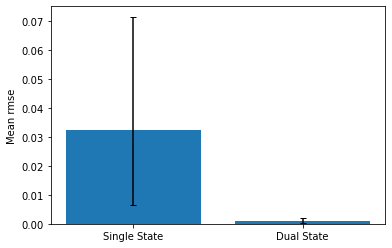

In [42]:
ci_single = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_single[:, -1]), scale=stat.sem(fits_single[:, -1]))
ci_dual = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_dual[:, -1]), scale=stat.sem(fits_dual[:, -1]))
plt.bar(('Single State', "Dual State"), [np.mean(fits_single[:, -1]), np.mean(fits_dual[:, -1])], yerr = ([ci_single[0], ci_dual[0]], [ci_single[1], ci_dual[1]]), capsize = 3)
plt.ylabel('Mean rmse')

In [43]:
stat.ttest_ind(fits_single[:, -1], fits_dual[:, -1])

Ttest_indResult(statistic=9.788766584723563, pvalue=6.356503502155063e-17)